In this tutorial we are going to learn the library **dplyr**, which is really useful for transforming the data (e.g. create new variables, reorder observations, etc).

# Loading dplyr

Like **ggplot2**, dplyr is also part of **tidyverse**. 

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
#sat.dat<-read.csv("https://vincentarelbundock.github.io/Rdatasets/csv/psych/sat.act.csv")
sat.dat<-read.csv("../../datasets/sat.act.csv")
sat.dat$gender<- as.factor( sat.dat$gender )
sat.dat$education<- as.factor( sat.dat$education )

In [3]:
# Like we learned, this gives the number of rows and columns of the data frame 
dim(sat.dat)

[1] 700   7

In [4]:
# And this, a summary of our data frame
summary(sat.dat)

       X         gender  education      age             ACT       
 Min.   :29442   1:247   0: 57     Min.   :13.00   Min.   : 3.00  
 1st Qu.:32117   2:453   1: 45     1st Qu.:19.00   1st Qu.:25.00  
 Median :34896           2: 44     Median :22.00   Median :29.00  
 Mean   :34731           3:275     Mean   :25.59   Mean   :28.55  
 3rd Qu.:37250           4:138     3rd Qu.:29.00   3rd Qu.:32.00  
 Max.   :39985           5:141     Max.   :65.00   Max.   :36.00  
                                                                  
      SATV            SATQ      
 Min.   :200.0   Min.   :200.0  
 1st Qu.:550.0   1st Qu.:530.0  
 Median :620.0   Median :620.0  
 Mean   :612.2   Mean   :610.2  
 3rd Qu.:700.0   3rd Qu.:700.0  
 Max.   :800.0   Max.   :800.0  
                 NA's   :13     

# `filter`: Pick observations by their values

This function allows you to subset observations based on specific conditions. The first argument is the name of the data frame. The second and subsequent arguments are the expressions that filter the data frame.

In [5]:
# Filter data for gender = 1
sat.dat.filter<-filter(sat.dat, gender == 1)

dim(sat.dat.filter)

[1] 247   7

In [6]:
# Filter data for gender = 1 and age less than 25
sat.dat.filter<-filter(sat.dat, gender == 1, age<25)
dim(sat.dat.filter)

[1] 146   7

In [7]:
# Filter observations within a range of ACT. Check that filtering worked by getting a summary of the filtered data frame. 
sat.dat.filter<-filter(sat.dat, (ACT > 25 & ACT < 30))
summary(sat.dat.filter)

       X         gender  education      age             ACT       
 Min.   :29503   1: 53   0:16      Min.   :15.00   Min.   :26.00  
 1st Qu.:31413   2:134   1:12      1st Qu.:19.00   1st Qu.:27.00  
 Median :34356           2:12      Median :23.00   Median :28.00  
 Mean   :34323           3:67      Mean   :25.11   Mean   :27.55  
 3rd Qu.:36680           4:40      3rd Qu.:28.00   3rd Qu.:28.00  
 Max.   :39937           5:40      Max.   :58.00   Max.   :29.00  
                                                                  
      SATV            SATQ      
 Min.   :400.0   Min.   :430.0  
 1st Qu.:550.0   1st Qu.:532.5  
 Median :600.0   Median :600.0  
 Mean   :608.1   Mean   :599.8  
 3rd Qu.:670.0   3rd Qu.:660.0  
 Max.   :800.0   Max.   :800.0  
                 NA's   :5      

# `arrange`: Reorder the rows

This function takes a data frame, and a set of column names (or more complicated expressions) to order by (in ascending order by default). If more than one column name is provided, each additional column is used to break ties in the values of preceding columns.

In [8]:
# This order first based in ACT, then SATQ and finally SATV
sat.dat.arrange<-arrange(sat.dat, ACT, SATQ, SATV)
head(sat.dat.arrange)

,X,gender,education,age,ACT,SATV,SATQ
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>
1,36093,1,2,22,3,200,400
2,30591,2,2,27,15,375,375
3,36906,2,0,18,15,470,500
4,37398,1,1,17,15,600,596
5,36763,1,1,23,15,600,600
6,34578,2,3,18,16,430,350


If we want to reorder in descending order, we can use the function `desc`:

In [9]:
sat.dat.arrange<-arrange(sat.dat, desc(ACT), SATQ, SATV)
head(sat.dat.arrange)

,X,gender,education,age,ACT,SATV,SATQ
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>
1,31080,2,4,33,36,500,500
2,29527,2,5,30,36,610,500
3,33539,2,3,31,36,700,500
4,32697,2,2,26,36,550,555
5,30129,2,5,30,36,660,610
6,39651,2,4,28,36,590,620


# `select`: Pick variables by their names

It allows you to pick a subset of variables.

In [10]:
# This selects columns by the given names of the columns. Here we just select ACT, SATQ and SATV
sat.dat.select<-select(sat.dat, ACT, SATQ, SATV)

head(sat.dat.select)

,ACT,SATQ,SATV
,<int>,<int>,<int>
1,24,500,500
2,35,500,600
3,21,470,480
4,26,520,550
5,31,550,600
6,28,640,640


If you want to select consecutive columns, we can always use the operator `:`, like with vectors.

In [11]:
head(sat.dat)

,X,gender,education,age,ACT,SATV,SATQ
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>
1,29442,2,3,19,24,500,500
2,29457,2,3,23,35,600,500
3,29498,2,3,20,21,480,470
4,29503,1,4,27,26,550,520
5,29504,1,2,33,31,600,550
6,29518,1,5,26,28,640,640


In [12]:
# This selects all columns between gender and ACT (inclusive)
sat.dat.select<-select(sat.dat, gender:ACT)

head(sat.dat.select)

,gender,education,age,ACT
,<fct>,<fct>,<int>,<int>
1,2,3,19,24
2,2,3,23,35
3,2,3,20,21
4,1,4,27,26
5,1,2,33,31
6,1,5,26,28


Instead of selecting columns, you can always use a minus (-) sign before the name of the columns to filter them out.

In [13]:
# This selects all columns byt those betweena gender and ACT (inclusive)
sat.dat.select<-select(sat.dat, -(gender:ACT))

head(sat.dat.select)

,X,SATV,SATQ
,<int>,<int>,<int>
1,29442,500,500
2,29457,600,500
3,29498,480,470
4,29503,550,520
5,29504,600,550
6,29518,640,640


# `mutate`: Create new variables

This function allows you to add new columns to data frames. These new columns can be set to any fixed value, a passed vector or, more interestingly and useful, from the existing columns in the data frame. New columns are always added at the end of the data frame.

In [14]:
# This creates a new column, which we called qvdiff, with the difference between SATQ and SATV
sat.dat.mutate<-mutate(sat.dat, qvdiff=SATQ-SATV)
head(sat.dat.mutate)

,X,gender,education,age,ACT,SATV,SATQ,qvdiff
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>
1,29442,2,3,19,24,500,500,0
2,29457,2,3,23,35,600,500,-100
3,29498,2,3,20,21,480,470,-10
4,29503,1,4,27,26,550,520,-30
5,29504,1,2,33,31,600,550,-50
6,29518,1,5,26,28,640,640,0


We can always use a preceding created column to define a new column.

In [15]:
# This defines a new column, which is just the absolute of a new column just created qvdiff
sat.dat.mutate<-mutate(sat.dat, qvdiff=SATQ-SATV, absqvdiff=abs(qvdiff))
head(sat.dat.mutate)

,X,gender,education,age,ACT,SATV,SATQ,qvdiff,absqvdiff
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>
1,29442,2,3,19,24,500,500,0,0
2,29457,2,3,23,35,600,500,-100,100
3,29498,2,3,20,21,480,470,-10,10
4,29503,1,4,27,26,550,520,-30,30
5,29504,1,2,33,31,600,550,-50,50
6,29518,1,5,26,28,640,640,0,0


In [16]:
# Obviously, this is going to giv an error because we are trying to use qvdiff before it was created
sat.dat.mutate<-mutate(sat.dat, absqvdiff=abs(qvdiff),  qvdiff=SATQ-SATV)
head(sat.dat.mutate)

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[33m![39m Problem while computing `absqvdiff = abs(qvdiff)`.
[1mCaused by error in `mask$eval_all_mutate()`:[22m
[33m![39m object 'qvdiff' not found


If we wanted to define a data frame with just the new columns, we can use `transmute` function:

In [17]:
# This just keeps the new created columns
sat.dat.transmute<-transmute(sat.dat, qvdiff=SATQ-SATV, absqvdiff=abs(qvdiff))
head(sat.dat.transmute)

,qvdiff,absqvdiff
,<int>,<int>
1,0,0
2,-100,100
3,-10,10
4,-30,30
5,-50,50
6,0,0


# `summarize`: Collapse many values down to a single summary

This functions collapses a data frame to a single row

In [18]:
summarize(sat.dat, mean.act = mean(ACT))

mean.act
<dbl>
28.54714


Ok, so this is not very useful, right? It gets so though if we combine it with `group_by` from **tidyverse** as well.

In [19]:
# This first groups by gender and then calculates the mean ACT within each category
by_gender <- group_by(sat.dat, gender)
summarize(by_gender, mean.act = mean(ACT))

gender,mean.act
<fct>,<dbl>
1,28.78543
2,28.41722


In [20]:
# This first groups by gender and education and then calculates the mean ACT within each combined category
by_gender <- group_by(sat.dat, gender, education)
summarize(by_gender, mean.act = mean(ACT), median.act = median(ACT), mean.satv = mean(SATV))

`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.


gender,education,mean.act,median.act,mean.satv
<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,0,29.03704,29,640.0741
1,1,26.70000,28,603.0000
1,2,26.65217,28,560.0000
1,3,28.56250,30,617.4375
1,4,28.94118,29,620.3137
1,5,30.82609,32,623.4783
2,0,26.06667,26,595.3000
2,1,28.12000,27,597.0000
2,2,27.33333,28,593.5714


# The pipe (%>%) operator 

Ok, so what is the fuss about all this if, in the end, most of what we've just seen can be done without having to use any of the above functions. For example:

In [21]:
# Here filtering observations of one gender
head(sat.dat[sat.dat$gender==1,])

,X,gender,education,age,ACT,SATV,SATQ
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>
4,29503,1,4,27,26,550,520
5,29504,1,2,33,31,600,550
6,29518,1,5,26,28,640,640
8,29529,1,3,19,22,520,560
11,29578,1,3,23,32,760,710
13,29617,1,4,32,21,600,600


In [22]:
# Here creating a new score as the difference between SATQ and SATV scores
new.sat.dat<-sat.dat

new.sat.dat$qvdiff <- new.sat.dat$SATQ - new.sat.dat$SATV

head(new.sat.dat)

,X,gender,education,age,ACT,SATV,SATQ,qvdiff
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>
1,29442,2,3,19,24,500,500,0
2,29457,2,3,23,35,600,500,-100
3,29498,2,3,20,21,480,470,-10
4,29503,1,4,27,26,550,520,-30
5,29504,1,2,33,31,600,550,-50
6,29518,1,5,26,28,640,640,0


Apart from the user-friendly sintax of the **dplyr** functions, imagine that you would want to apply many transformation steps to your data frame. One should save intermediate objects or nest many functions within the same line. For example:

Nesting:

In [23]:
# This selects observations for gender 1, then creates a new variable and finally computes its mean  
summarize(mutate(filter(sat.dat, sat.dat$gender==1), qvdiff=SATQ-SATV), mean.act = mean(qvdiff, na.rm = TRUE))

mean.act
<dbl>
20.51429


Saving intermediate results:

In [24]:
# This selects observations for gender 1, then create a new variable and finally computes its mean
sat.dat.subset<-sat.dat[sat.dat$gender==1,]
sat.dat.subset$qvdiff<-sat.dat.subset$SATQ - sat.dat.subset$SATV

head(sat.dat.subset)
mean(sat.dat.subset$qvdiff, na.rm = TRUE)

,X,gender,education,age,ACT,SATV,SATQ,qvdiff
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>
4,29503,1,4,27,26,550,520,-30
5,29504,1,2,33,31,600,550,-50
6,29518,1,5,26,28,640,640,0
8,29529,1,3,19,22,520,560,40
11,29578,1,3,23,32,760,710,-50
13,29617,1,4,32,21,600,600,0


[1] 20.51429

Now is when the  %>% operator from **tidyverse** brings it magic, since it allows you to apply multiple operations from left-to-right, top-to-bottom (i.e. it is read as “then”).

In [25]:
sat.dat %>% 
filter(gender==1) %>%
mutate(qvdiff=SATQ-SATV) %>%
summarize(mean.act = mean(qvdiff, na.rm = TRUE))

mean.act
<dbl>
20.51429


This considerably improves the readability of code. It's pretty cool, right?

In [26]:
# This was the example of the previous tutorial
sat.dat %>% 
        summarize(mu = mean(ACT), 
                  pop_med = median(ACT), 
                  sigma = sd(ACT), 
                  pop_iqr = IQR(ACT),
                  pop_min = min(ACT), 
                  pop_max = max(ACT),
                  pop_q1 = quantile(ACT, 0.25),  # first quartile, 25th percentile
                  pop_q3 = quantile(ACT, 0.75))  # third quartile, 75th percentile)

mu,pop_med,sigma,pop_iqr,pop_min,pop_max,pop_q1,pop_q3
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
28.54714,29,4.82356,7,3,36,25,32


<div class="alert alert-info"> <b>Practice</b>:  Using the operator %>%, perform the following operations:
    <ol>
<li>Filter observations such that we keep only those with an age between 18 and 45 years. </li>
<li>Create a new variable, "SATV.avg", as the average of SATQ and SATV.</li>
<li>Select the columns "gender", "education", and "SATV.avg".</li>
<li>Group the data frame by gender and education</li>
<li>Summarize the data frame by computing the mean and standard deviation of "SATV.avg".</li>
<li>With the resulting data frame, create a barplot using geom_bar, such that the x position corresponds to each level of education and the height of each bar (i.e. the y position) is the mean of "SATV.avg". In order to have a different bar per gender, pass this variable to the fill argument in aesthetics (set position="dodge" to have these bars next to each other instead of stacked). Finally, use geom_errorbar to add the standard deviation as an error bar (set position="dodge" again here). Visit <a href="https://r-graph-gallery.com/4-barplot-with-error-bar.html"> https://r-graph-gallery.com/4-barplot-with-error-bar.html</a> to see an example of how to generate this kind of plots </li></ol> </div>

`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.


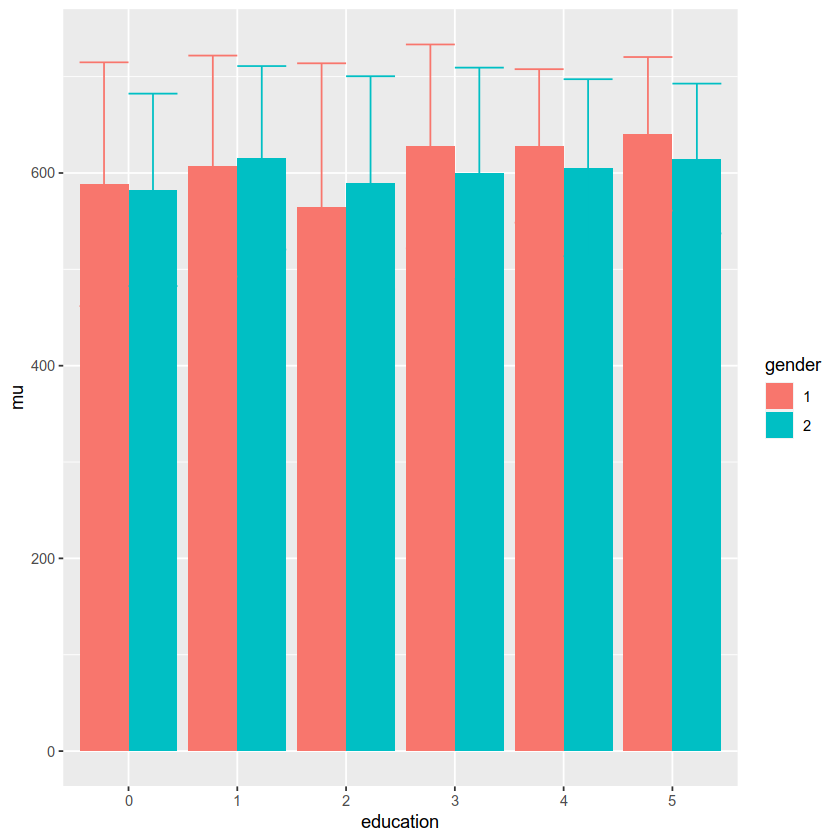

In [27]:
# Start with your original data frame
sat.dat %>% 
# Perform first operation (filtering)
filter(age>=18 & age<=60) %>% 
# Perform second operation (creation of the new variable)
mutate(SATV.avg = 0.5*(SATV+SATQ)) %>% 
# Select the columns (third operation)
select(gender, education, SATV.avg) %>% 
# Group by gender and education
group_by(gender, education) %>%
# Summarise the mean and st
summarise(mu=mean(SATV.avg, na.rm = TRUE), 
          std=sd(SATV.avg, na.rm = TRUE)) %>%
# And now ggplot
ggplot(mapping = aes(x=education, y=mu, fill=gender)) + 
geom_bar(stat="identity", position="dodge") + 
geom_errorbar(mapping = aes(ymin=mu - std, ymax=mu + std, color=gender), position="dodge")

One thing, maybe in the sixth operation (visualization), you guys didn't pass gender to the fill argument in `aes` as I have done. It's fine, but you would've got something  that looks a bit weird:

`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.


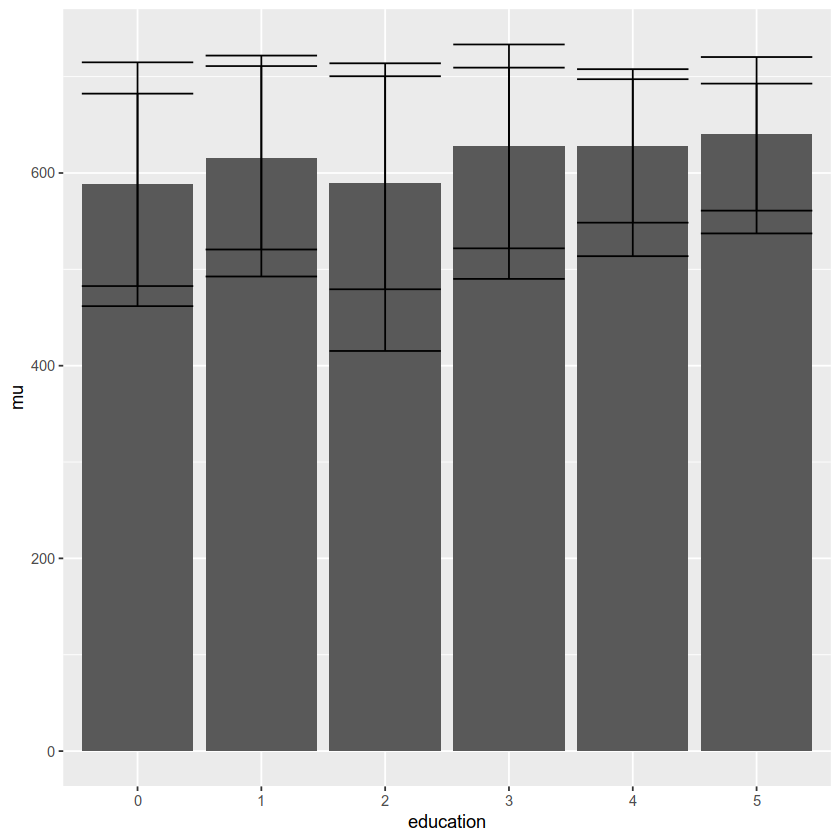

In [28]:
# Start with your original data frame
sat.dat %>% 
# Perform first operation (filtering)
filter(age>=18 & age<=60) %>% 
# Perform second operation (creation of the new variable)
mutate(SATV.avg = 0.5*(SATV+SATQ)) %>% 
# Select the columns (third operation)
select(gender, education, SATV.avg) %>% 
# Group by gender and education
group_by(gender, education) %>%
# Summarise the mean and st
summarise(mu=mean(SATV.avg, na.rm = TRUE), 
          std=sd(SATV.avg, na.rm = TRUE)) %>%
# And now ggplot
ggplot(mapping = aes(x=education, y=mu)) + 
geom_bar(stat="identity", position="dodge") + 
geom_errorbar(mapping = aes(ymin=mu - std, ymax=mu + std), position="dodge")

The reason for that is that if you have a look at the data frame thay you are passing to ggplot:

In [29]:
# Start with your original data frame
sat.dat %>% 
# Perform first operation (filtering)
filter(age>=18 & age<=60) %>% 
# Perform second operation (creation of the new variable)
mutate(SATV.avg = 0.5*(SATV+SATQ)) %>% 
# Select the columns (third operation)
select(gender, education, SATV.avg) %>% 
# Group by gender and education
group_by(gender, education) %>%
# Summarise the mean and st
summarise(mu=mean(SATV.avg, na.rm = TRUE), 
          std=sd(SATV.avg, na.rm = TRUE)) 

`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.


gender,education,mu,std
<fct>,<fct>,<dbl>,<dbl>
1,0,588.3333,126.51581
1,1,607.2059,114.65261
1,2,564.5652,149.27791
1,3,627.5974,105.80009
1,4,628.1078,79.66952
1,5,640.6522,79.70681
2,0,582.5000,99.85704
2,1,615.7778,95.19473
2,2,589.8750,110.55623


You can see that each category of education has two values of the mean and standard deviation, because we have also grouped by  gender. Then, when calling ggplot without using the gender, R will try to plot both values per category education on the graph. That's why you see two errorbars above each bar. You can see this better  just using `geom_point`

`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.


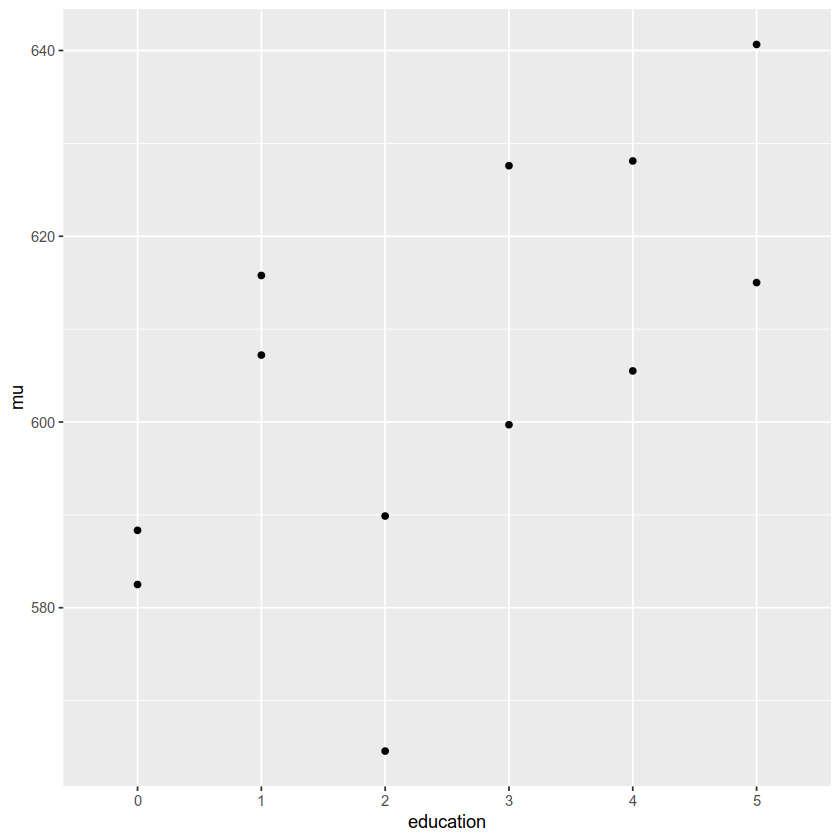

In [30]:
# Start with your original data frame
sat.dat %>% 
# Perform first operation (filtering)
filter(age>=18 & age<=60) %>% 
# Perform second operation (creation of the new variable)
mutate(SATV.avg = 0.5*(SATV+SATQ)) %>% 
# Select the columns (third operation)
select(gender, education, SATV.avg) %>% 
# Group by gender and education
group_by(gender, education) %>%
# Summarise the mean and st
summarise(mu=mean(SATV.avg, na.rm = TRUE), 
          std=sd(SATV.avg, na.rm = TRUE)) %>%
# And now ggplot
ggplot(mapping = aes(x=education, y=mu)) + 
geom_point() 

You see? per education category there are two points when plotting the mean of SATV.avg, because there's one value for each gender category. 

If you were interested in plotting only the summary statistics per education, across both genders, then it would've been better just to group by education from the begining. Rememeber, you always need to manipulate the data according to your needs

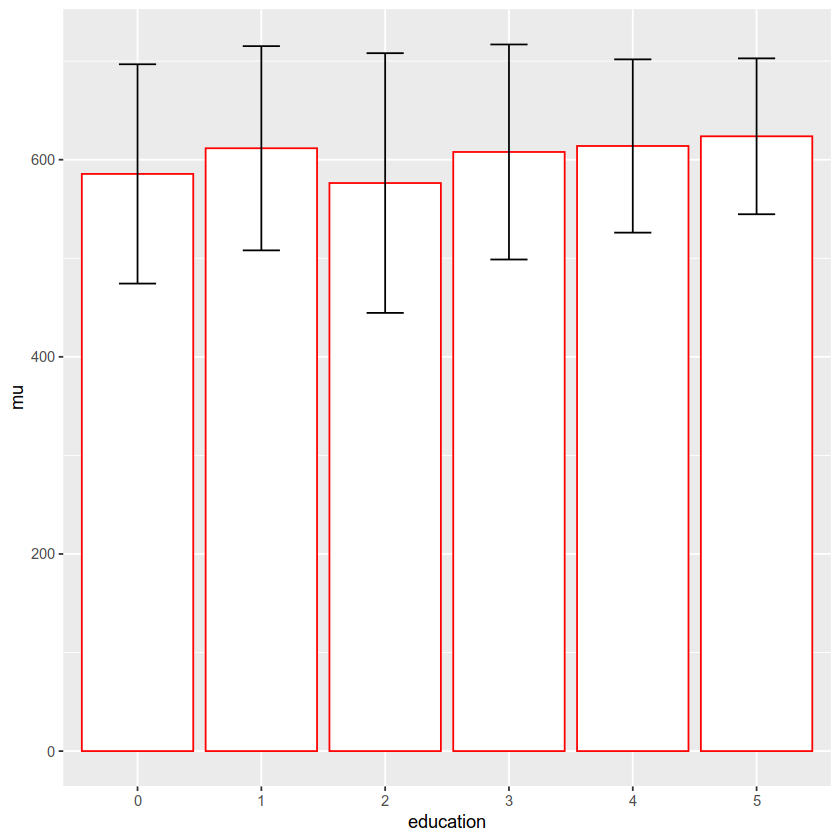

In [31]:
# Start with your original data frame
sat.dat %>% 
# Perform first operation (filtering)
filter(age>=18 & age<=60) %>% 
# Perform second operation (creation of the new variable)
mutate(SATV.avg = 0.5*(SATV+SATQ)) %>% 
# Select the columns (third operation)
select(gender, education, SATV.avg) %>% 
# Group by education only now
group_by(education) %>%
# Summarise the mean and st
summarise(mu=mean(SATV.avg, na.rm = TRUE), 
          std=sd(SATV.avg, na.rm = TRUE)) %>%
# And now ggplot
ggplot(mapping = aes(x=education, y=mu)) + 
geom_bar(stat="identity", position="dodge", color="red", fill="white") + 
geom_errorbar(mapping = aes(ymin=mu - std, ymax=mu + std), position="dodge", width=0.3)